# Barabási-model in Octave

the function named "barabasi" is an octave implementation of the classical random graph.

In [7]:
'script!';# dummy line for interpreting as script
function edge=barabasi(m,n_step)
# parameters:
# input:
# m: how many old vertices are chosen at each step? m>1
# n_step: number of steps including the initial one
# output:
# edge: an array for storing the edges, 1dim
# local:
# chosen: for temp storing
# i_edge: the idx of the last edge in edge
# n_step=10000;
# m=3;

    n_edge=(m*(m-1))/2+m*(n_step-1);
    edge=zeros(2*n_edge,1);
    chosen=zeros(m+1,1);
    i_edge=0;

# initial step, inserting a complete m-graph
    for it=1:m
        for jt=(it+1):m
            ++i_edge;
            edge(i_edge)=it;
            ++i_edge;
            edge(i_edge)=jt;
        end
    end
    i_vertex=m;


# generating the graf
    for i_step=2:n_step
# choosing the future neighbours of the new one
        i_m=0;
        while i_m<m
            v=edge(randi(i_edge));
            it=1;
            while it<=i_m
                if(chosen(it)==v)
                    break;
                end
                ++it;
            end
            if it>i_m
                ++i_m;
                chosen(i_m)=v;
            end
        end

# inserting the new edges
        i_vertex=i_vertex+1;
        for i_m=1:m
            ++i_edge;
            edge(i_edge)=chosen(i_m);
            ++i_edge;
            edge(i_edge)=i_vertex;
        end
    end
    #edge=reshape(edge,2,n_edge)';
end #function


generating the graph with parameters below:

In [11]:
m=3;
n_step=300;
tic
edge=barabasi(m, n_step);
toc


Elapsed time is 0.237215 seconds.


let's compute and plot the degree distribution in loglog scale:


ans =

     0
     0
   125
    57
    29
    20
    12
    16
     8
     8
     3
     7
     1
     0
     1
     4
     0
     0
     0
     1
     0
     0
     0
     0
     2
     0
     0
     1
     0
     0
     0
     0
     0
     1
     2
     0
     0
     0
     3
     1



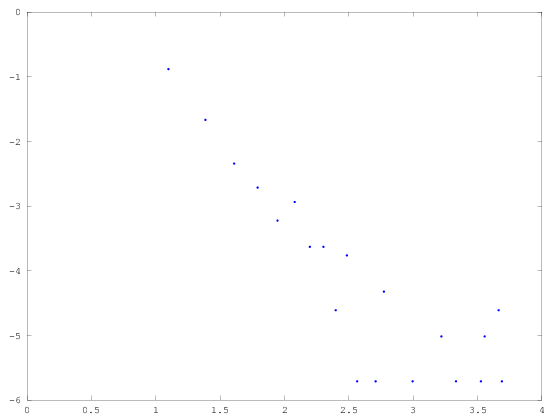

In [13]:
n_vertex=m+n_step-1;
pkg load statistics
dist=tabulate(edge);
dist=tabulate(dist(:,2));
#dist
dist(:,2)
plot(log(dist(:,1)),log(dist(:,2)/n_vertex),'.')


In [6]:
dlmwrite('edgelist_octave',reshape(edge,2,n_edge)',' ');


error: 'n_edge' undefined near line 1 column 43
error: evaluating argument list element number 3
error: evaluating argument list element number 2
